In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


# 訓練資料標籤比例分析

In [4]:
print('訓練資料類別比例 : ')
print(round(train_df['Label'].value_counts()/len(train_df),2))

訓練資料類別比例 : 
Label
0    0.27
5    0.25
1    0.19
3    0.15
4    0.09
2    0.04
Name: count, dtype: float64


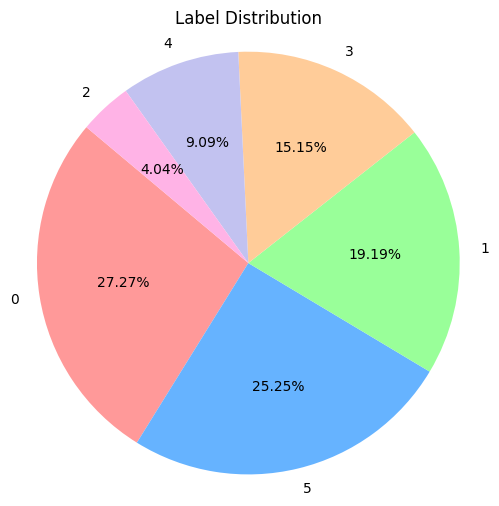

In [5]:
label_counts = train_df['Label'].value_counts()
label_ratios = round(label_counts / len(train_df), 2).sort_values(ascending=False)

plt.figure(figsize=(6, 6))
plt.pie(label_ratios, labels=label_ratios.index, autopct='%1.2f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.title("Label Distribution")
plt.axis('equal')  
plt.show()

# 影像增強

(512, 512, 3)


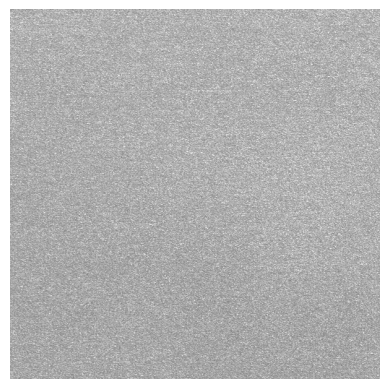

In [6]:
import os
train_dir='./train_images'
test_dir='./test_images'

train_sample=str(train_df.loc[0,'ID'])
train_sample_path=os.path.join(train_dir,train_sample)
image=cv2.imread(train_sample_path)
print(image.shape)

plt.imshow(image)
plt.axis('off')
plt.show()

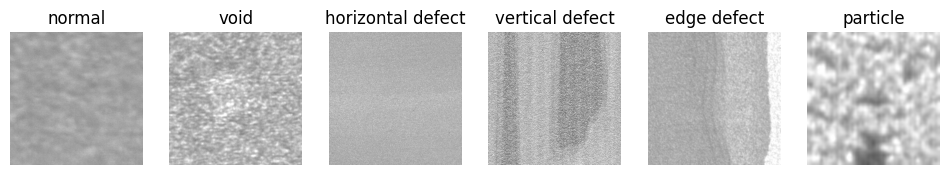

In [7]:
label_dict = {
    0: "normal",
    1: "void",
    2: "horizontal defect",
    3: "vertical defect",
    4: "edge defect",
    5: "particle"
}

def Show_image(df):
    fig, ax = plt.subplots(1, 6, figsize=(12, 6))
    for index,class_id in enumerate([0,1,2,3,4,5]):
        sample=df[df['Label']==class_id].sample(1, random_state=42).reset_index(drop=True)
        sample_path=os.path.join(train_dir, str(sample['ID'].iloc[0]))
        image = cv2.imread(sample_path)
        ax[index].imshow(image)
        ax[index].set_title(label_dict[class_id])
        ax[index].axis("off")
Show_image(train_df)

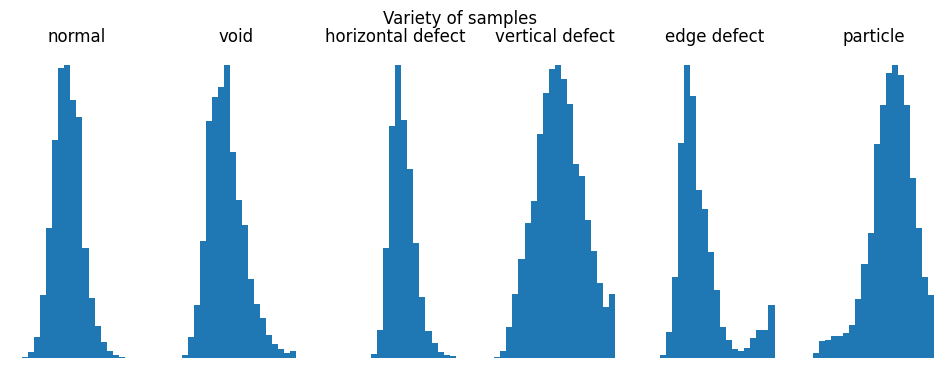

In [8]:
def Show_hist(df):
    fig, ax = plt.subplots(1, 6, figsize=(12, 4))
    for index,class_id in enumerate([0,1,2,3,4,5]):
        sample=df[df['Label']==class_id].sample(1, random_state=42).reset_index(drop=True)
        sample_path=os.path.join(train_dir, str(sample['ID'].iloc[0]))
        image = cv2.imread(sample_path)
        ax[index].hist(image.reshape(-1), bins=20)
        ax[index].set_title(label_dict[class_id])
        ax[index].axis("off")
    plt.suptitle(f"Variety of samples", fontsize=12)
    plt.show()

Show_hist(train_df)

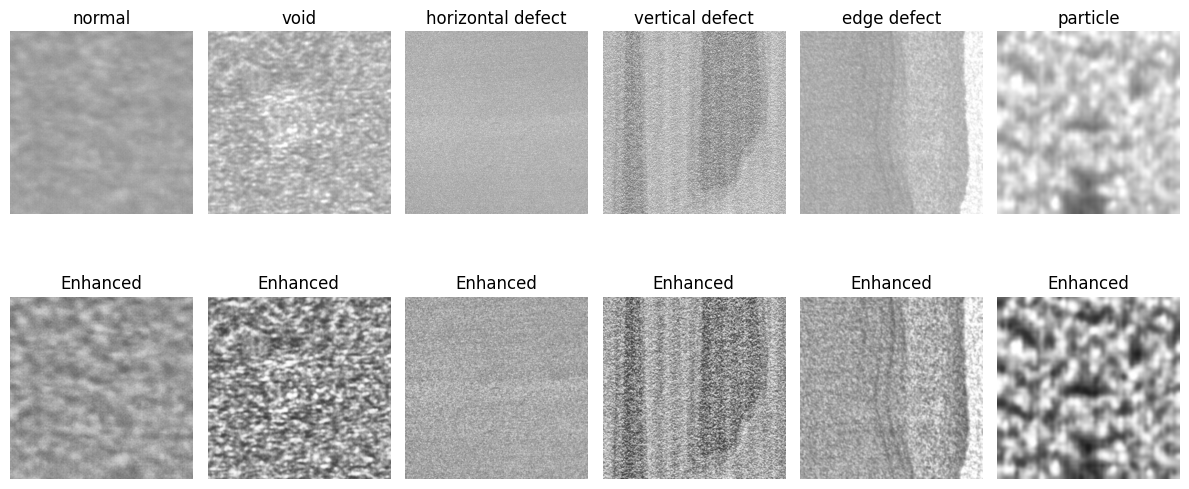

In [9]:
def Data_enhance(df):
    fig, ax = plt.subplots(2, 6, figsize=(12, 6)) 
    for index, class_id in enumerate([0, 1, 2, 3, 4, 5]):
        sample = df[df['Label'] == class_id].sample(1, random_state=42).reset_index(drop=True)
        sample_path = os.path.join(train_dir, str(sample['ID'].iloc[0]))
        
        # 讀取原圖
        image = cv2.imread(sample_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
        ax[0, index].imshow(image) 
        ax[0, index].set_title(f"{label_dict[class_id]}")
        ax[0, index].axis("off")

        # 影像增強
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 1)
        clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
        enhanced = clahe.apply(blurred)
        enhanced_rgb = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)

        ax[1, index].imshow(enhanced_rgb)
        ax[1, index].set_title(f"Enhanced")
        ax[1, index].axis("off")

    plt.tight_layout()
    plt.show()
Data_enhance(train_df)

# 類別不平衡處理 -> 給少數類別較高的權重

In [10]:
from sklearn.model_selection import train_test_split
def Split_train_valid(df):
    train_df_split, valid_df = train_test_split(
                df, test_size=0.2, random_state=42,stratify=df["Label"]
                )
    train_df_split=train_df_split.reset_index(drop=True)
    valid_df=valid_df.reset_index(drop=True)
    return train_df_split,valid_df

train_df_split, valid_df=Split_train_valid(train_df)
print(len(train_df_split),len(valid_df))

2022 506


In [11]:
train_counts = train_df_split['Label'].value_counts()
train_label_ratios = 1 / train_counts  
train_label_ratios = train_label_ratios / train_label_ratios.sum()

sorted_dict = dict(sorted(train_label_ratios.items(), key=lambda x: x[0]))
label_weight=list(sorted_dict.values())
print(sorted_dict)

{0: 0.06782336188800699, 1: 0.09278373618689278, 2: 0.45695990072044707, 3: 0.12104898032329722, 4: 0.19039995863351958, 5: 0.07098406224783643}
